# Introduction of the Nifti File Format
You'll learn all about the transformation from DICOM to the NIfTI file format and how you can work with them.

This demo is a jupyter notebook, i.e. intended to be run step by step.

Author: Eric Einspänner
<br>
Contributor: Nastaran Takmilhomayouni

First version: 6th of July 2023


Copyright 2023 Clinic of Neuroradiology, Magdeburg, Germany

License: Apache-2.0

## Table of contents
0. [File Formats](#NIfTI-File-Format-Description)
1. [Read DICOM File](#Read-DICOM-File)
2. [Print DICOM Header](#Print-DICOM-Header)
3. [Print NIfTI Header](#Print-NIfTI-Header)

## NIfTI File Format Description
NIfTI is one of the most ubiquitous file formats for storing neuroimaging data.
The images can be stored as a pair of files (hdr/img), or a single file (nii).
The NIfTI format stores spatial transforms so that software can determine the orientation of the image.

## Read DICOM File


In [ ]:
# Make sure figures appears inline and animations works
# Edit this to "%matplotlib notebook" when using the "classic" jupyter notebook interface
%matplotlib widget

In [ ]:
from pathlib import Path                        # pathlib for easy path handling
import numpy as np
import matplotlib.pyplot as plt
import pydicom                                  # to read DICOM files
from pydicom.data import get_testdata_file      # to load a test dataset

import dicom2nifti                              # to convert DICOM files to the NIftI format
import nibabel as nib                           # nibabel to handle nifti files

# load test file
dcm_data = get_testdata_file('MR_small.dcm')

# read a DICOM file
dcm = pydicom.dcmread(dcm_data)

The following function `format_and_render_plot()` is just a simplify formatting method for the plots in this notebook.

In [ ]:
def format_and_render_plot(axis=False, legend=False):
    '''
    Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Turning off axis grids and legends, if not explicitly requested.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.
    '''
    fig = plt.gcf()
    for ax in fig.axes:
        if not axis:
            ax.axis('off')
        if legend:  
            ax.legend(loc='center right')  
    plt.tight_layout()
    plt.show()

## Convert DICOM to Nifti

As with the conversion of ordinary image files, we need to convert medical image files for various applications. There are already ready-made modules in Python for this.

With the help of `dicom2nifti`, we convert a series of 2D DICOM images (remember: each slice is a separat image) into a 3D Nifti file. This also works for 4D DICOM files.

In [ ]:
# Define the path to the DICOM files
head_mri_dicom = Path('../ImageAnalysis/Data/Brain/SE000001')

# Convert the DICOM files to the NIfTI format
dicom2nifti.convert_directory(head_mri_dicom, ".")

## Print NIfTI Header
To read a NIfTI file, you can use the load function, which returns a Nifti1Image object containing the data from the NIfTI file.

In [31]:
# Load the NIfTI file
nifti = nib.load('201_t2w_tse.nii.gz')

# Print the NIfTI object
print(nifti)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine:
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal

## Print Nifti attributes
Similar to the DICOM header, Nifti contains an header with metadata. However, this is significantly reduced and no longer contains any patient- or location-specific information, but only the most important image parameters.

In [36]:
print(nifti.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : -0.016685799
quatern_c       : -0.9974202
quatern_d       : -0.069515765
qoffset_x       : 115.27232
qoffset_y  

<ins>Exercise:</ins> Compare this and the previous output! What do you notice?

Similar to DICOM, we can also access the metadata here using different methods and extract individual values.

In [40]:
print(nifti.header['dim'])

[  3 256 256  27   1   1   1   1]


The field `dim` contains the size of the image array. The first element (`dim[0]`) contains the number of dimensions. The dimensions 1, 2 and 3 are assumed to refer to space (x, y, z), the 4th dimension is assumed to refer to time, and the remaining dimensions, 5, 6 and 7, can be anything else. The value `dim[i]` is a positive integer representing the length of the i-th dimension.

In [41]:
print('Shape of the nifti image is:', nifti.shape)                   # get the image shape
print('Shape of the nifti image is:', nifti.header.get_data_shape()) # get the image shape in a different way

shape of the nifti image is: (256, 256, 27)
shape of the nifti image is: (256, 256, 27)


## Get Pixel Data
In order to be able to work with the image data and, for example, create a graphical representation, we need intensity values of the pixels/voxels. Since we have a 3D nifti image here, our array is also 3D.

In [43]:
# Get the image data
head_mri = nifti.get_fdata()

# Print the image data type
print(head_mri.dtype)

# Print the image data shape
print(head_mri.shape)

float64
(256, 256, 27)


We now want to create nine subplots over the entire length of the z-axis (27 slices).

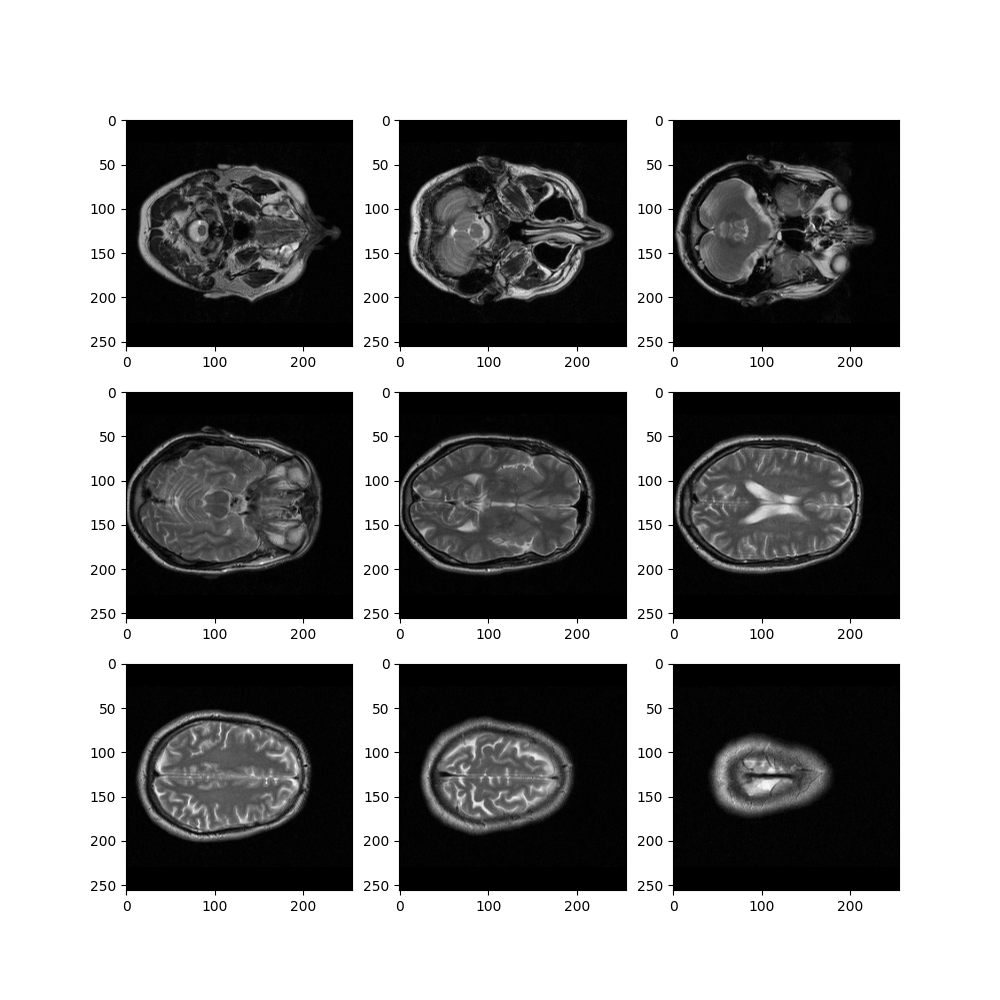

In [44]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(head_mri[:,:,slice_counter],cmap='gray')
        slice_counter+=3

link :https://www.kaggle.com/code/rinichristy/dicom-to-nifti-conversion-using-nibabel

## Write NIfTI files

Many times, image data obtained as the results of an algorithm or processing step has to be stored in the NIfTI format. This can be easily done using NiBabel. As an example, the 3D image array from above can be used to perform a simple processing step and save it as a new NIfTI file.

In [45]:
# Here apply a very simple threshold and set all image voxels to 0 that have a value smaller than 300
head_mri_processed = np.where(head_mri < 300, 0, head_mri)

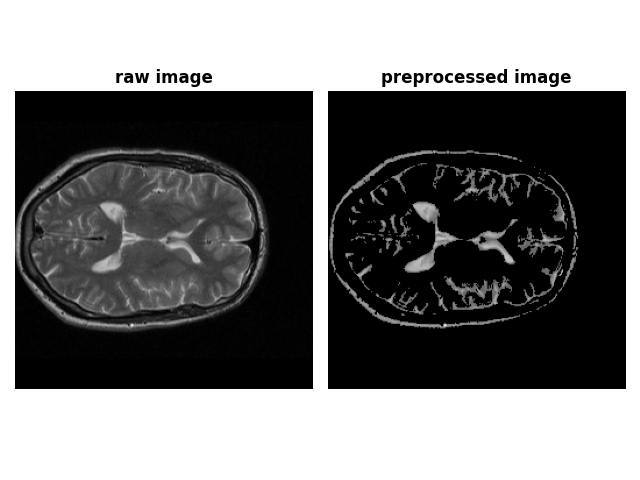

In [46]:
# Now have a look at the results of this processing step (plotting slice number 13)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(head_mri[:,:,13], cmap='gray')
axes[0].set_title('raw image', fontweight ="bold")
axes[1].imshow(head_mri_processed[:,:,13], cmap='gray')
axes[1].set_title('preprocessed image', fontweight ="bold")
format_and_render_plot()

To save this, first, convert the processed head_mri image array file back to a nifti object by using the numpy array of the processed image and header information about the image geometry (affine matrix) from the original NIftI file.

In [ ]:
# Convert the processed image to a nifti object
processed_nifti = nib.Nifti1Image(head_mri_processed, nifti.affine)

Now save the processed image using the save function in NiBabel

In [ ]:
# Save the preprocessed image as a NIfTI file
nib.save(processed_nifti, '201_t2w_tse_processed.nii.gz')

## ----------------------------------------------------------------------------------------

## Optional: Additional File Formats
We will briefly introduce other Fie formats below. We will not go into them in detail.